# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_pickle("~/Downloads/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

#### Segregating dates of crashes into corresponding 'week-days'

In [14]:
# Convert 'DateTimeColumn' to datetime format if it's not already
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'], errors='coerce')

# Check if the 'DateTimeColumn' is in datetime format
if pd.api.types.is_datetime64_any_dtype(df['CRASH DATE_CRASH TIME']):
    # Split the 'DateTimeColumn' into separate 'Date', 'Day', and 'Time' columns
    df['Date_of_crash'] = df['CRASH DATE_CRASH TIME'].dt.date
    df['Days_of_week'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%A')
    df['Time_of_crash'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%H:%M:%S')

    # Print the resulting DataFrame
    print(df)
else:
    print("The 'CRASH DATE_CRASH TIME' is not in datetime format. Please check the column data.")


df

        CRASH DATE_CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0         2021-09-11 02:39:00        NaN      NaN        NaN        NaN   
1         2022-03-26 11:45:00        NaN      NaN        NaN        NaN   
2         2022-06-29 06:55:00        NaN      NaN        NaN        NaN   
3         2021-09-11 09:35:00   BROOKLYN  11208.0  40.667202 -73.866500   
4         2021-12-14 08:13:00   BROOKLYN  11233.0  40.683304 -73.917274   
...                       ...        ...      ...        ...        ...   
2018240   2023-07-03 18:05:00        NaN      NaN  40.866806 -73.931010   
2018241   2023-07-22 21:39:00      BRONX  10457.0  40.844177 -73.902920   
2018242   2023-07-02 17:55:00  MANHATTAN  10006.0  40.711033 -74.014540   
2018243   2023-07-22 13:15:00     QUEENS  11433.0  40.691580 -73.793190   
2018244   2023-07-22 03:00:00     QUEENS  11433.0  40.700240 -73.792854   

                        LOCATION           ON STREET NAME CROSS STREET NAME  \
0                   

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Day,Time,Date_of_crash,Days_of_week,Time_of_crash
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Sedan,NaN,NaN,NaN,2021-09-11,Saturday,02:39:00,2021-09-11,Saturday,02:39:00
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,2022-03-26,Saturday,11:45:00,2022-03-26,Saturday,11:45:00
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Pick-up Truck,NaN,NaN,NaN,2022-06-29,Wednesday,06:55:00,2022-06-29,Wednesday,06:55:00
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,2021-09-11,Saturday,09:35:00,2021-09-11,Saturday,09:35:00
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,2021-12-14,Tuesday,08:13:00,2021-12-14,Tuesday,08:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Sedan,NaN,NaN,NaN,2023-07-03,Monday,18:05:00,2023-07-03,Monday,18:05:00
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,2023-07-22,Saturday,21:39:00,2023-07-22,Saturday,21:39:00
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,2023-07-02,Sunday,17:55:00,2023-07-02,Sunday,17:55:00
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,E-Bike,NaN,NaN,NaN,2023-07-22,Saturday,13:15:00,2023-07-22,Saturday,13:15:00


#### Plotting the number of accidents/crashes against particular days of the week

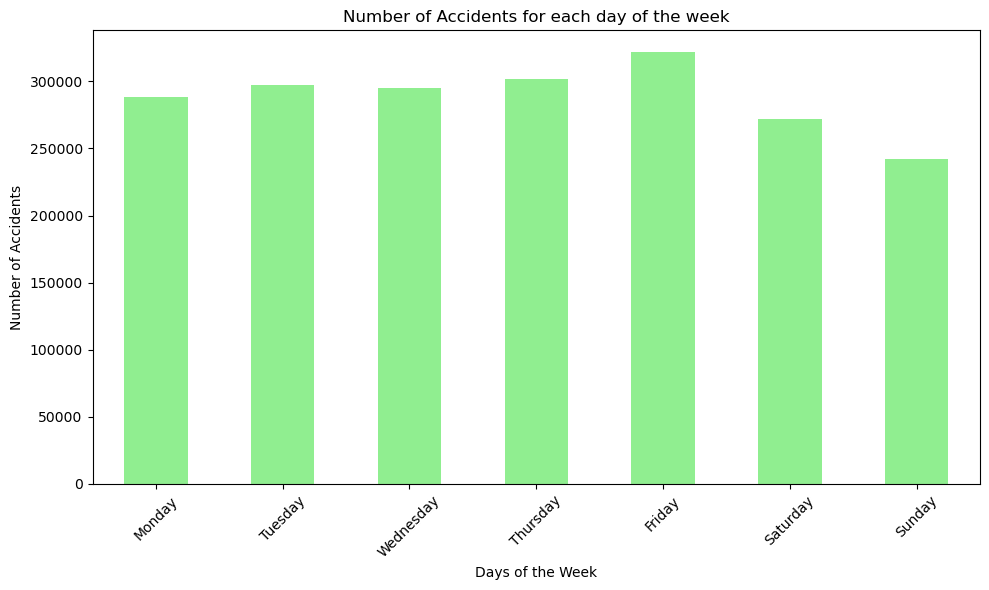

In [19]:
# Define the order of days of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'Day' and count the number of occurrences
crashes_daywise = df['Days_of_week'].value_counts().sort_index()

# Reorder the index based on the specified day_order
crashes_daywise = crashes_daywise.reindex(order_of_days, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
crashes_daywise.plot(kind='bar', color='lightgreen')
plt.title('Number of Accidents for each day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

#### Determine which hour of the day had the most number of accidents

In [22]:
# Convert the 'Time' column to a datetime format
df['Time_of_crash'] = pd.to_datetime(df['Time_of_crash'], format='%H:%M:%S').dt.time

# Extract the hour from the 'Time' column
df['Hour'] = df['Time_of_crash'].apply(lambda x: x.hour)

# Group the data by 'Hour' and count the number of accidents for each hour
accidents_by_hour = df['Hour'].value_counts().sort_index()

# Find the hour with the highest number of accidents
hour_with_most_accidents = accidents_by_hour.idxmax()

# Print the hour with the most accidents and its count
print(f"The hour with the most accidents is {hour_with_most_accidents} o'clock with {accidents_by_hour[hour_with_most_accidents]} accidents.")

The hour with the most accidents is 16 o'clock with 145924 accidents.


#### Categorizing the time slots according to a particular day

In [26]:
# Create a function to categorize time into slots
def slot_of_day(time):
    if 5 <= time.hour < 12:
        return "Morning"
    elif 12 <= time.hour < 17:
        return "Afternoon"
    elif 17 <= time.hour < 21:
        return "Evening"
    else:
        return "Night"

# Create new columns for time slot and day of the week
df['TimeSlot'] = df['Time_of_crash'].apply(slot_of_day)

# Group the data by day of the week and time slot, and count accidents in each group
accident_counts = df.groupby(['Days_of_week', 'TimeSlot']).size().reset_index(name='AccidentCount')

# Find the time slot and day of the week with the most accidents
most_accidents = accident_counts.loc[accident_counts['AccidentCount'].idxmax()]

print("Day with the most accidents:", most_accidents['Days_of_week'])
print("Time slot with the most accidents:", most_accidents['TimeSlot'])
print("Number of accidents:", most_accidents['AccidentCount'])

Day with the most accidents: Friday
Time slot with the most accidents: Afternoon
Number of accidents: 101917


#### Plot the number of accients according to the times of the day

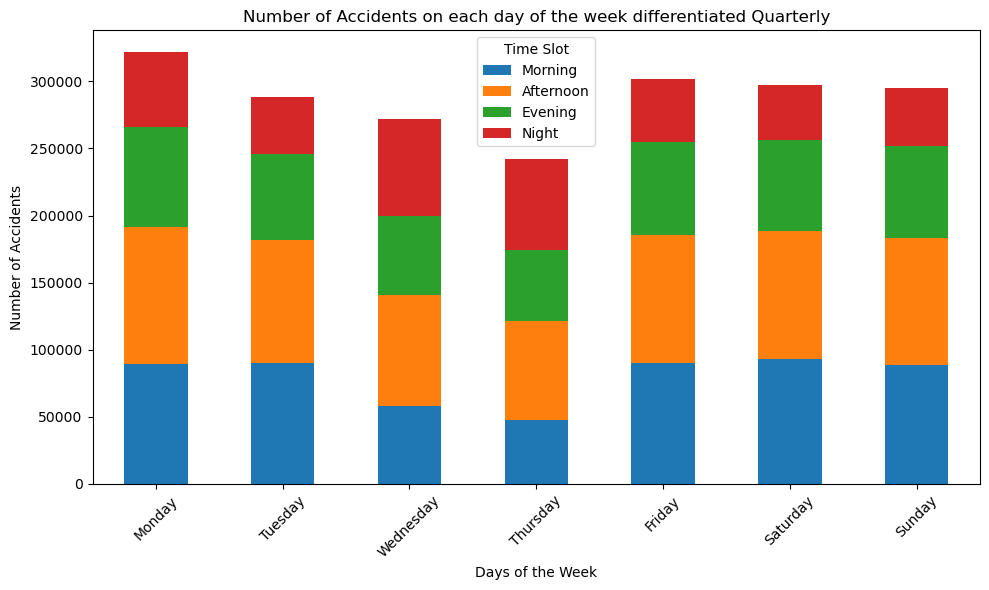

In [28]:
# Group by 'DayOfWeek' and 'TimeSlot' and count the accidents
grouped = df.groupby(['Days_of_week', 'TimeSlot']).size().unstack(fill_value=0)

# Reorder columns to have them in a logical order
column_order = ['Morning', 'Afternoon', 'Evening', 'Night']
grouped = grouped[column_order]

# Create a bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents on each day of the week differentiated Quarterly')

# Customize the x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45)

# Show the legend
plt.legend(title='Time Slot')

# Display the plot
plt.tight_layout()
plt.show()

#### Determine the borough including its zipcode with the most number of accidents

In [29]:
# Group the data by 'Borough Key' and 'Zip Code Key', and count accidents in each group
borough_zip_counts = df.groupby(['BOROUGH', 'ZIP CODE']).size().reset_index(name='AccidentCount')

# Find the zip code with the most accidents in each borough
most_accidents_by_borough = borough_zip_counts.groupby('BOROUGH').apply(lambda x: x.loc[x['AccidentCount'].idxmax()])

# Print the result for each borough
for _, row in most_accidents_by_borough.iterrows():
    borough = row['BOROUGH']
    zip_code = row['ZIP CODE']
    accident_count = row['AccidentCount']
    print(f"Borough: {borough}, Zip Code with Most Accidents: {zip_code}, Number of Accidents: {accident_count}")

Borough: BRONX, Zip Code with Most Accidents: 10467.0, Number of Accidents: 10022
Borough: BROOKLYN, Zip Code with Most Accidents: 11207.0, Number of Accidents: 19792
Borough: MANHATTAN, Zip Code with Most Accidents: 10019.0, Number of Accidents: 11288
Borough: QUEENS, Zip Code with Most Accidents: 11385.0, Number of Accidents: 12905
Borough: STATEN ISLAND, Zip Code with Most Accidents: 10306.0, Number of Accidents: 6490


#### Plotting the number of people injured/killed in each borough

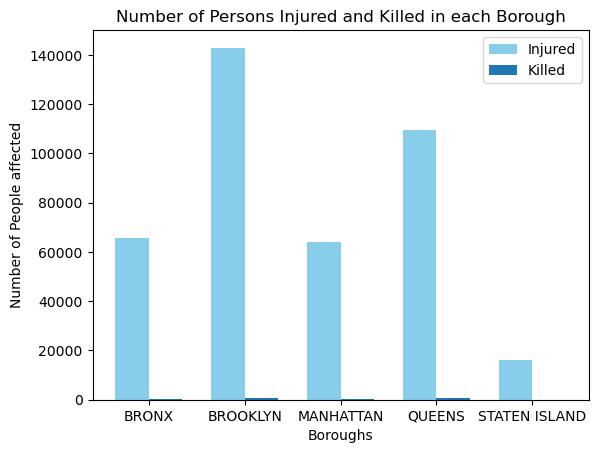

In [31]:
# Group the data by 'BOROUGH'
borough_grouping = df.groupby('BOROUGH').sum()

# Get the distinct borough names
boroughs = borough_grouping.index

# Get the number of bars (categories)
num_of_boroughs = len(boroughs)

# Define the width of each bar
bar_width = 0.35

# Create an index for the x-axis
x = range(num_of_boroughs)

# Create the bar graph
plt.bar(x, borough_grouping['NUMBER OF PERSONS INJURED'], width=bar_width, label='Injured', color = 'skyblue')
plt.bar([i + bar_width for i in x], borough_grouping['NUMBER OF PERSONS KILLED'], width=bar_width, label='Killed')

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in x], boroughs)

# Set labels and title
plt.xlabel('Boroughs')
plt.ylabel('Number of People affected')
plt.title('Number of Persons Injured and Killed in each Borough')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Plotting the data of types of people injured/killed in each borough

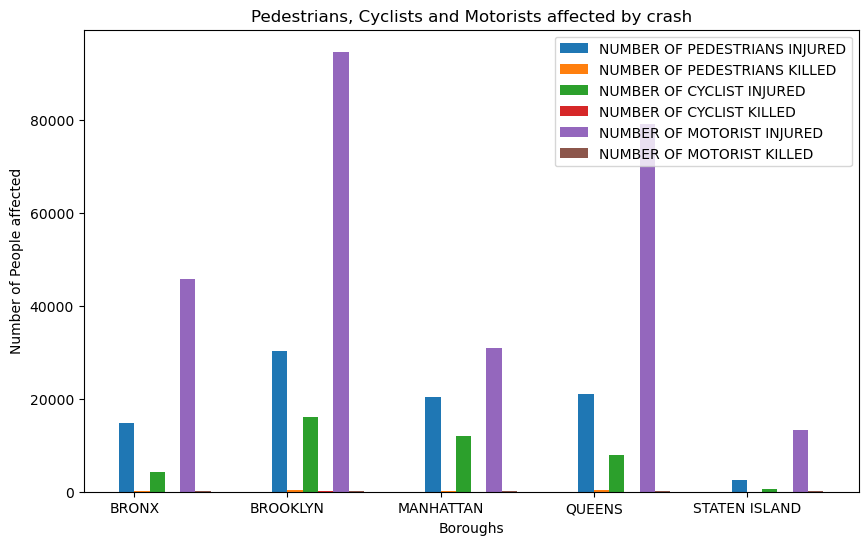

In [32]:
# Define the columns you want to include in the borough_groups_bars bar chart
name_of_bars = [
    'NUMBER OF PEDESTRIANS INJURED', 
    'NUMBER OF PEDESTRIANS KILLED', 
    'NUMBER OF CYCLIST INJURED', 
    'NUMBER OF CYCLIST KILLED', 
    'NUMBER OF MOTORIST INJURED', 
    'NUMBER OF MOTORIST KILLED']

# Group the data by 'BOROUGH' and calculate the sum for selected columns
borough_groups_bars = df.groupby("BOROUGH")[name_of_bars].sum()

# Transpose the DataFrame for plotting
borough_groups_bars = borough_groups_bars.transpose()

# Create a list of boroughs
boroughs = borough_groups_bars.columns

# Define the x-axis positions for each group
x = np.arange(len(boroughs))

# Define the width of each bar
width = 0.1

# Create the borough_groups_bars bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(name_of_bars)):
    ax.bar(x + (i * width), borough_groups_bars.iloc[i], width, label=name_of_bars[i])

# Set labels, title, and legend
ax.set_xlabel("Boroughs")
ax.set_ylabel("Number of People affected")
ax.set_title("Pedestrians, Cyclists and Motorists affected by crash")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(boroughs)
ax.legend()

plt.show()

## Borough with the maximum number of crashes reported since 2012

In [41]:
# Convert the 'CRASH DATE' column to a datetime object
df['Date_of_crash'] = pd.to_datetime(df['Date_of_crash'])

# Filter the data to include only records since 2012
df_from_2012 = df[df['Date_of_crash'] >= '2012-01-01']

# Group the data by borough and count the number of crashes in each borough
borough_crash_counts = df_from_2012['BOROUGH'].value_counts()

# Find the borough with the highest total number of crashes
max_crashes_borough = borough_crash_counts.idxmax()

print(f"The borough with the highest total number of crashes reported since 2012 is {max_crashes_borough}.")

The borough with the highest total number of crashes reported since 2012 is BROOKLYN.


## Borough with the maximum number of crashes adjusted for population

In [42]:
# Population data
population_data = {
    'Bronx': 1446788,
    'Brooklyn': 2648452,
    'Manhattan': 1638281,
    'Queens': 2330295,
    'Staten Island': 487155
}

# Filter the data frame to include only rows from July 2012 onwards
df['Date_of_crash'] = pd.to_datetime(df['Date_of_crash'])  # Convert DATE column to datetime
start_date = pd.to_datetime('2012-07-01')
new_df = df[df['Date_of_crash'] >= start_date]

# Calculate the total number of crashes for each borough in the filtered data
crashes_by_borough = new_df['BOROUGH'].value_counts().to_dict()

# Calculate crashes per 100,000 people for each borough
crashes_per_100k = {}
for borough, crashes in crashes_by_borough.items():
    population = population_data.get(borough.capitalize())  # Get population for the borough
    if population is not None:
        crashes_per_100k[borough] = (crashes / population) * 100000

# Find the borough with the most crashes per 100,000 people
most_crashes_borough = max(crashes_per_100k, key=crashes_per_100k.get)

print(f"The borough with the most crashes per 100,000 people is {most_crashes_borough} with {crashes_per_100k[most_crashes_borough]:.2f} crashes per 100,000 people.")

The borough with the most crashes per 100,000 people is MANHATTAN with 19121.63 crashes per 100,000 people.


## Analyzing the leading cause of crashes

In [43]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
updated_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Calculate the total number of accidents for each contributing factor
contributing_factor_counts = updated_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Find the leading cause of crashes (excluding 'Unspecified')
leading_cause = contributing_factor_counts.idxmax()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(updated_df)
proportion = contributing_factor_counts[leading_cause] / total_accidents

print(f"The leading cause of crashes (excluding 'Unspecified') is '{leading_cause}'")
print(f"The proportion of accidents attributable to this cause is {proportion:.2%}")

The leading cause of crashes (excluding 'Unspecified') is 'Driver Inattention/Distraction'
The proportion of accidents attributable to this cause is 30.27%


## Top 3 causes of crashes 

In [44]:
# Exclude the 'Unspecified' factor from the counts
factors = contributing_factor_counts.index[0:3]  # Get the top 3 factors (excluding 'Unspecified')

# Calculate the proportion of total accidents accounted for by the top 3 causes
total_accidents = len(updated_df)
proportion = contributing_factor_counts[factors].sum() / total_accidents

print(f"The top 3 causes of crashes (excluding 'Unspecified') account for {proportion:.2%} of total crashes.")

The top 3 causes of crashes (excluding 'Unspecified') account for 47.37% of total crashes.


## Analyzing fatalities

In [45]:
# Filter the dataset to include only accidents with at least one fatality
fatal_accidents = df_from_2012[df_from_2012['NUMBER OF PERSONS KILLED'] >= 1]

# Calculate the total count of accidents with at least one fatality
total_fatal_accidents = len(fatal_accidents)

print(f"The total count of accidents that involved at least one fatality since 2012 is {total_fatal_accidents}.")

The total count of accidents that involved at least one fatality since 2012 is 2804.


## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [46]:
# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the total number of accidents with at least one fatality
fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] > 0]
total_fatal_accidents = len(fatal_accidents)

# Calculate the average number of fatal accidents for every 1000 accidents
average_fatal_accidents = (total_fatal_accidents / total_accidents) * 1000

print(f"On average, for every 1000 accidents, {average_fatal_accidents:.3f} have resulted in at least one person dead.")

On average, for every 1000 accidents, 1.389 have resulted in at least one person dead.


## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [47]:
# Calculate the number of accidents without a Borough code
without_code_accidents = df['BOROUGH'].isna().sum()

# Calculate the proportion of accidents without a Borough code
proportion_without_borough = without_code_accidents / total_accidents

print(f"The proportion of accidents in the data without a Borough code is {proportion_without_borough:.1%}.")

The proportion of accidents in the data without a Borough code is 31.1%.


## Which combinations of vehicles have the most number of accidents

In [48]:
# Combine 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' into a single column for analysis
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + ' + ' + df['VEHICLE TYPE CODE 2']

# Calculate the most common combination of vehicles involved in accidents
common_combination = df['Vehicle Combination'].mode().iloc[0]

# Calculate the number of accidents involving the most common combination
num_accidents_with_most_common_combination = len(df[df['Vehicle Combination'] == common_combination])

print(f"The combination of vehicles with the most number of accidents is: {common_combination}")
print(f"The number of accidents involving this combination is: {num_accidents_with_most_common_combination}")

The combination of vehicles with the most number of accidents is: Sedan + Sedan
The number of accidents involving this combination is: 197944


***  
## Finished